In [1]:
import tribolium_clustering as tc
import pyclesperanto_prototype as cle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, SparsePCA
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score

lund_folder = tc.get_folder_path('Wolgast Folder')
lund = tc.processed_dataset(lund_folder)

lund_combined_thesis_props = lund.get_combined_thesis_props_no_correlation()
lund_combined_thesis_props.keys()

No Predictions in Regionprops of C:/Users/ryans/Documents/output data (big)/Wolgast Gastrulation Labels//


Index(['area', 'bbox_area', 'extent', 'feret_diameter_max', 'max_intensity',
       'mean_intensity', 'min_intensity', 'solidity', 'centroid-0',
       'centroid-1', 'centroid-2', 'image_stdev',
       'avg distance of 6 closest points',
       'stddev distance of 6 closest points', 'touching neighbor count',
       'aspect_ratio'],
      dtype='object')

In [3]:
saved_folder = tc.get_folder_path('hope')
embedding_7dims = np.load(saved_folder+'embedding 7dims 400 neighbours wolgast.npy')
predictions_k2_to_8 = np.load(saved_folder+'predictions for cluster numbers 2 - 8.npy')

No Predictions in Regionprops of C:/Users/ryans/Documents/output data (big)/Wolgast Gastrulation Labels//


C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\pyopencl\__init__.py:267: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\_qt\__init__.py:54: UserWarning: 

napari was tested with QT library `>=5.12.3`.
The version installed is 5.9.7. Please report any issues with
this specific QT version at https://github.com/Napari/napari/issues.
  warn(message=warn_message)


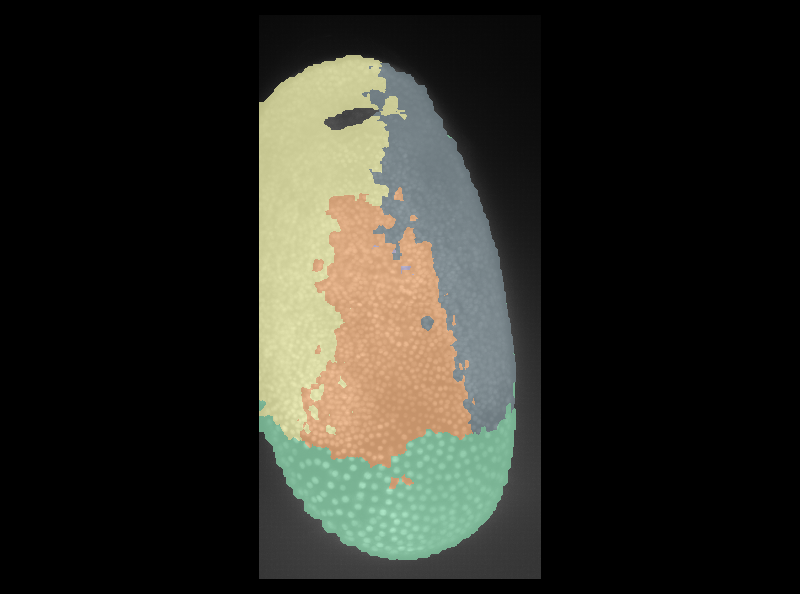

In [4]:
def gen_cluster_image_and_orig_image_from_dataset(dataset,timepoint,prediction, all_timepoint_predictionlist = True):
    from tribolium_clustering.data_visualisation import generate_parametric_cluster_image
    from pyclesperanto_prototype import push
    
    labels      = dataset.get_labels(timepoint)
    orig_image  = dataset.get_intensity_image(timepoint)
    cum_indices = dataset.cumulative_label_lengths()
    
    
    if all_timepoint_predictionlist:
        timepoint_pred = prediction[cum_indices[timepoint]:cum_indices[timepoint+1]]
    else:
        timepoint_pred = prediction
    
    cluster_image = generate_parametric_cluster_image(labels, push(labels), timepoint_pred)
    
    return cluster_image, orig_image

np_cmap = tc.napari_label_cmap()
rot_lund = (0,180,0)
import napari

img_5cl_t0, original_img_t0 = gen_cluster_image_and_orig_image_from_dataset(lund,0,predictions_k2_to_8[3])

viewer = napari.Viewer(ndisplay=3)
viewer.add_image(original_img_t0, rotate=rot_lund)
viewer.add_labels(img_5cl_t0,rotate=rot_lund,color = np_cmap)

napari.utils.nbscreenshot(viewer,canvas_only=True)

No Predictions in Regionprops of C:/Users/ryans/Documents/output data (big)/Wolgast Gastrulation Labels//


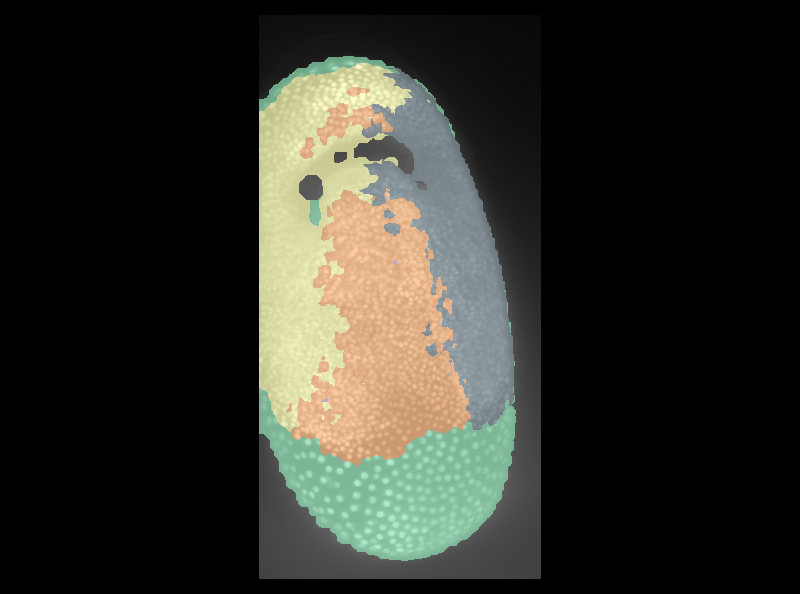

In [9]:
img_5cl, original_img = gen_cluster_image_and_orig_image_from_dataset(lund,6,predictions_k2_to_8[3])

viewer.close()
viewer = napari.Viewer(ndisplay=3)
viewer.add_image(original_img, rotate=rot_lund)
viewer.add_labels(img_5cl,rotate=rot_lund,color = np_cmap)

napari.utils.nbscreenshot(viewer,canvas_only=True)

No Predictions in Regionprops of C:/Users/ryans/Documents/output data (big)/Wolgast Gastrulation Labels//


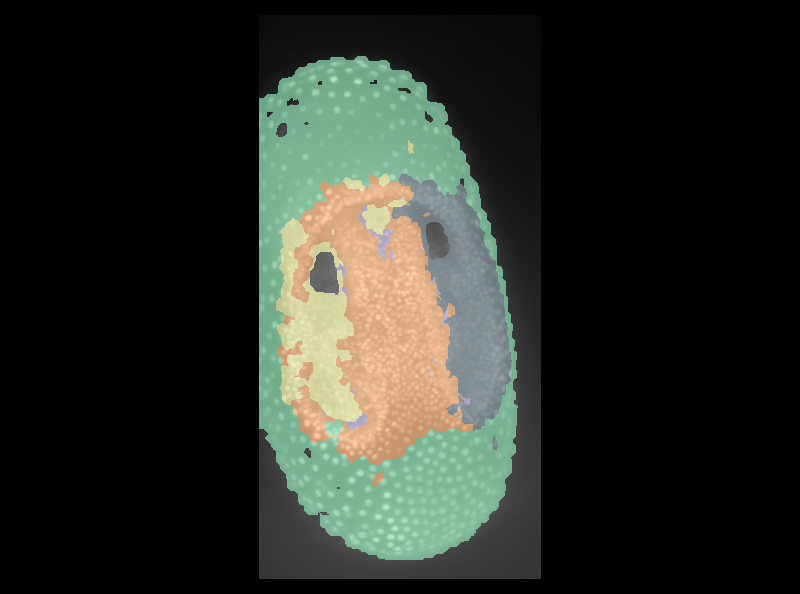

In [6]:
viewer.close()
img_5cl, original_img = gen_cluster_image_and_orig_image_from_dataset(lund,12,predictions_k2_to_8[3])

viewer = napari.Viewer(ndisplay=3)
viewer.add_image(original_img, rotate=rot_lund)
viewer.add_labels(img_5cl,rotate=rot_lund,color = np_cmap)

napari.utils.nbscreenshot(viewer,canvas_only=True)

No Predictions in Regionprops of C:/Users/ryans/Documents/output data (big)/Wolgast Gastrulation Labels//


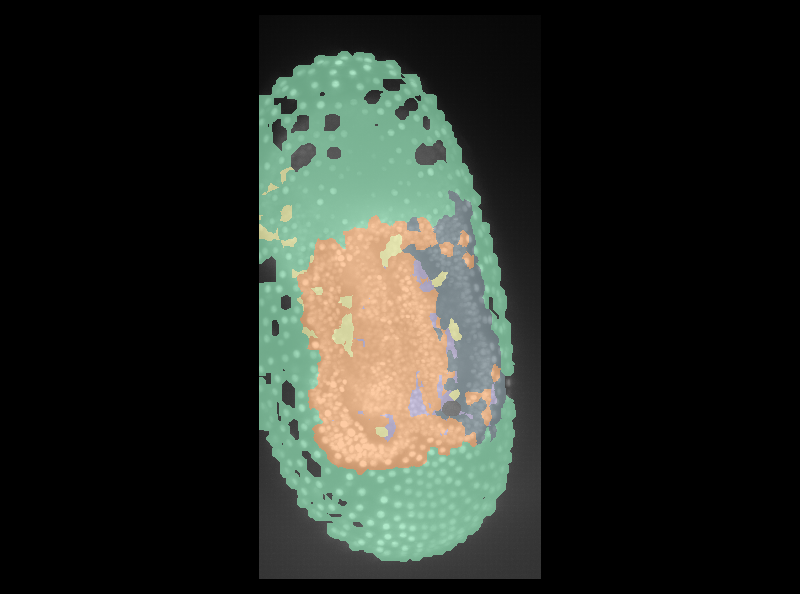

In [7]:
viewer.close()
img_5cl, original_img = gen_cluster_image_and_orig_image_from_dataset(lund,24,predictions_k2_to_8[3])

viewer = napari.Viewer(ndisplay=3)
viewer.add_image(original_img, rotate=rot_lund)
viewer.add_labels(img_5cl,rotate=rot_lund,color = np_cmap)

napari.utils.nbscreenshot(viewer,canvas_only=True)

No Predictions in Regionprops of C:/Users/ryans/Documents/output data (big)/Wolgast Gastrulation Labels//


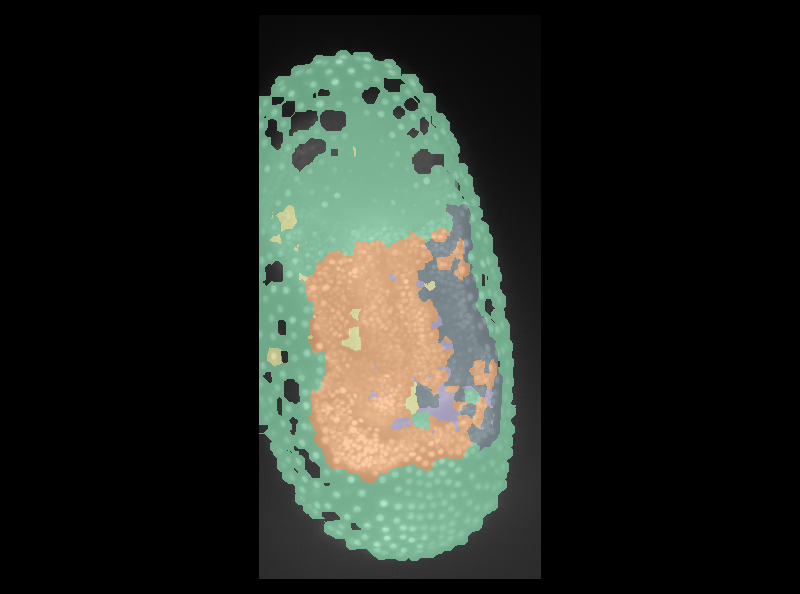

In [8]:
viewer.close()
img_5cl, original_img = gen_cluster_image_and_orig_image_from_dataset(lund,31,predictions_k2_to_8[3])

viewer = napari.Viewer(ndisplay=3)
viewer.add_image(original_img, rotate=rot_lund)
viewer.add_labels(img_5cl,rotate=rot_lund,color = np_cmap)

napari.utils.nbscreenshot(viewer,canvas_only=True)